In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime, timedelta

In [8]:
from electricity_price_predictor.data import get_data, get_shifted_price

In [3]:
from electricity_price_predictor.sarimax import sarimax_forecast_24, plot_forecast, plot_sarimax_forecast, plot_sarimax_forecast_24

In [60]:
plot_sarimax_forecast_24()

KeyError: 'Publication_MarketDocument'

In [81]:
forecast, past = sarimax_forecast_24()

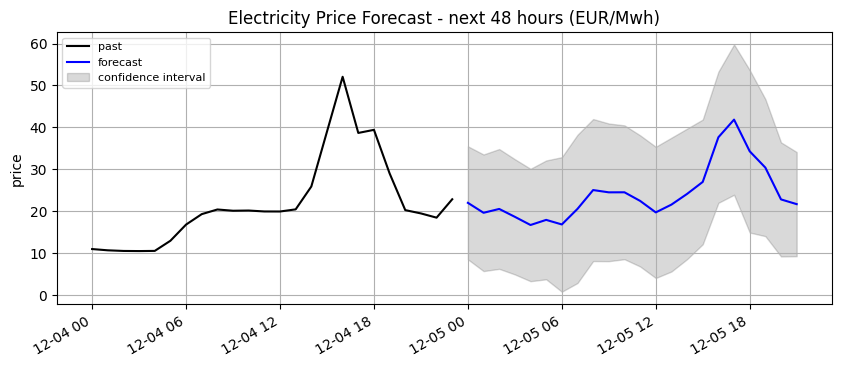

In [92]:
# plot forecast
plot_forecast(forecast.price, past, forecast.lower, forecast.upper)

In [5]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\users\guli\.venvs\lewagon_project\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\guli\.venvs\lewagon_project\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


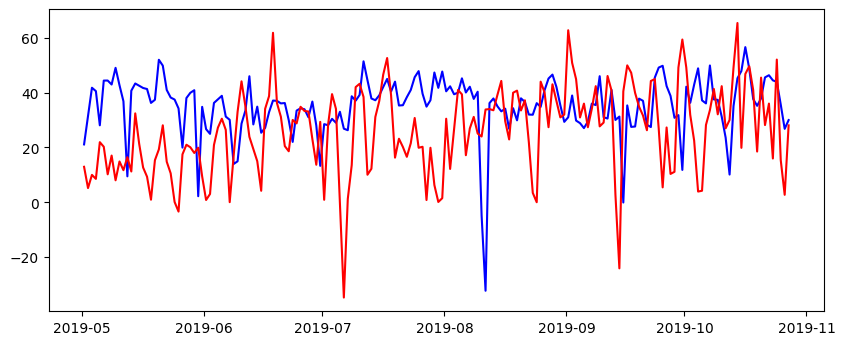

In [48]:
# for year 2019 
df= get_shifted_price()
df = df[df.index.hour==11]
df_2019 = df[df.index.year==2019]
df_2020 = df[df.index.year==2020]
df_2019['2020'] = 0
df_2019.iloc[:339,1] = df_2020.price.to_list()
plt.figure(figsize=(10,4), dpi=100)
plt.plot(df_2019.price[120:300], label='2019', color='blue')
plt.plot(df_2019['2020'][120:300], label='2020', color='red');

Text(0, 0.5, '2020')

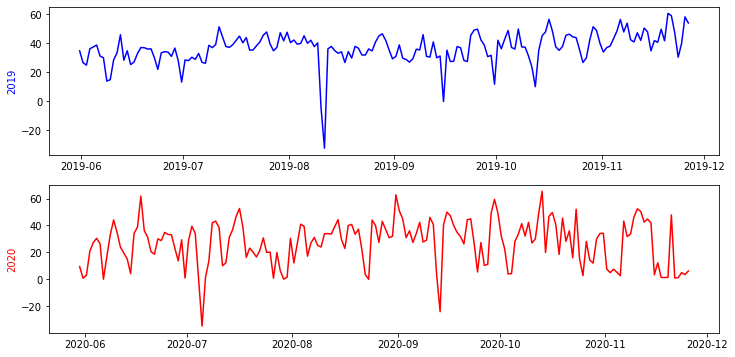

In [57]:

df = df[df.index.hour==11]
fig, ax = plt.subplots(2,1, figsize=(12,6))
ax[0].plot(df[df.index.year==2019][150:330], color='blue')
ax[0].set_ylabel('2019', color='blue')
ax[1].plot(df[df.index.year==2020][150:330], color='red')
ax[1].set_ylabel('2020', color='red')